In [1]:

!pip install gensim

In [2]:
!pip install --upgrade gensim

In [3]:
!pip install stanza

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.1/990.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 18.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-many

In [4]:
!pip install indicnlp
!pip install indic-nlp-library

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 13.7 MB/s eta 0:00:00


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
import stanza

# Download the Telugu language model
stanza.download('te')

# Load the Telugu language model
nlp = stanza.Pipeline('te', processors='tokenize,pos,lemma,depparse')

def tokenize_telugu(text):
    # Assuming Stanza will handle tokenization
    doc = nlp(text)
    tokens = [word.text for sent in doc.sentences for word in sent.words]
    return tokens

def extracting_triplets(folder_path):
    all_triplets = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            file_path = os.path.join(folder_path, filename)

            with open(file_path, 'r', encoding='utf-8') as file:
                article_text = file.read()

            # Tokenize Telugu text
            telugu_tokens = tokenize_telugu(article_text)

            # Process Telugu text using Stanza
            doc = nlp(' '.join(telugu_tokens))

            # Extract subject, object and relation from dependency parse
            for sent in doc.sentences:
                subjects = {}
                objects = {}
                verbs = {}

                for word in sent.words:
                    if word.deprel == 'nsubj':  # Subject
                        subjects[word.id] = word
                    elif word.deprel in ['obj', 'obl']:  # Object or oblique
                        objects[word.id] = word
                    elif word.deprel == 'root' or word.upos == 'VERB':  # Relation (root of the dependency tree)
                        verbs[word.id] = word

                for verb_id, verb in verbs.items():
                    for subj_id, subj in subjects.items():
                        if subj.head == verb_id:
                            for obj_id, obj in objects.items():
                                if obj.head == verb_id:
                                    all_triplets.append((subj.text, verb.text, obj.text))
                                elif obj.deprel in ['obl', 'obj']:
                                    for word in sent.words:
                                        if word.head == obj_id and word.id == subj.head:
                                            all_triplets.append((subj.text, verb.text, obj.text))
    return all_triplets

# Folder path containing the text files
folder_path = '/content/drive/MyDrive/real'

# Extract triplets from all text files in the folder
all_triplets = extracting_triplets(folder_path)

# Print all extracted triplets
for triplet in all_triplets:
    print(triplet)


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: te (Telugu) ...


INFO:stanza:Downloaded file to /root/stanza_resources/te/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: te (Telugu):
| Processor | Package    |
--------------------------
| tokenize  | mtg        |
| pos       | mtg_charlm |
| lemma     | identity   |
| depparse  | mtg_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


('రాయిమామిడి', 'చెందిన', 'జిల్లా')
('రాయిమామిడి', 'చెందిన', 'మండలానికి')
('సైన్స్', 'ఉన్నాయి', 'కళాశాల')
('సైన్స్', 'ఉన్నాయి', 'పాడేరులోనూ')
('సమీప', 'ఉన్నాయి', 'కళాశాల')
('సమీప', 'ఉన్నాయి', 'పాడేరులోనూ')
('పాలీటెక్నిక్', 'ఉన్నాయి', 'కళాశాల')
('పాలీటెక్నిక్', 'ఉన్నాయి', 'పాడేరులోనూ')
('డాక్టర్లు', 'లేరు', 'శాలలో')
('అందుబాటులో', 'ఉంది', 'గ్రామంలో')
('వ్యవస్థ', 'లేదు', 'గ్రామంలో')
('చెత్తను', 'పారబోస్తారు', 'వీధుల')
('ఆఫీసు', 'నుండి', 'సౌకర్యం')
('సౌకర్యం', 'ఉన్నాయి', 'దూరంలో')
('రహదారి', 'ఉన్నాయి', 'దూరంలో')
('రోడ్లు', 'ఉన్నాయి', 'గ్రామంలో')
('బ్యాంకు', 'ఉంది', 'గ్రామంలో')
('బ్యాంకు', 'ఉంది', 'సహకార')
('ఏటీఎమ్', 'ఉన్నాయి', 'దూరంలో')
('మార్కెట్', 'నుండి', 'దూరంలో')
('గ్రామం', 'నుండి', 'పోలింగ్')
('హాలు', 'ఉన్నాయి', 'దూరంలో')
('వ్యవస్థ', 'ఉంది', 'గ్రామంలో')
('అండాలు', 'చెందుతాయి', 'ఆవృత')
('విత్తనాలుగాను', 'చెందుతాయి', 'ఆవృత')
('అభివృద్ధి', 'చెందుతాయి', 'ఆవృత')
('అండాశయం', 'చెందుతుంది', 'ప్రతిఫలదళంలోని')
('అండాశయం', 'చెందుతుంది', 'చిరుఫలంగా')
('అభివృద్ధి', 'చెందుతుంది', 'ప్రతిఫలదళంలోని')

In [7]:
print(all_triplets)

[('రాయిమామిడి', 'చెందిన', 'జిల్లా'), ('రాయిమామిడి', 'చెందిన', 'మండలానికి'), ('సైన్స్', 'ఉన్నాయి', 'కళాశాల'), ('సైన్స్', 'ఉన్నాయి', 'పాడేరులోనూ'), ('సమీప', 'ఉన్నాయి', 'కళాశాల'), ('సమీప', 'ఉన్నాయి', 'పాడేరులోనూ'), ('పాలీటెక్నిక్', 'ఉన్నాయి', 'కళాశాల'), ('పాలీటెక్నిక్', 'ఉన్నాయి', 'పాడేరులోనూ'), ('డాక్టర్లు', 'లేరు', 'శాలలో'), ('అందుబాటులో', 'ఉంది', 'గ్రామంలో'), ('వ్యవస్థ', 'లేదు', 'గ్రామంలో'), ('చెత్తను', 'పారబోస్తారు', 'వీధుల'), ('ఆఫీసు', 'నుండి', 'సౌకర్యం'), ('సౌకర్యం', 'ఉన్నాయి', 'దూరంలో'), ('రహదారి', 'ఉన్నాయి', 'దూరంలో'), ('రోడ్లు', 'ఉన్నాయి', 'గ్రామంలో'), ('బ్యాంకు', 'ఉంది', 'గ్రామంలో'), ('బ్యాంకు', 'ఉంది', 'సహకార'), ('ఏటీఎమ్', 'ఉన్నాయి', 'దూరంలో'), ('మార్కెట్', 'నుండి', 'దూరంలో'), ('గ్రామం', 'నుండి', 'పోలింగ్'), ('హాలు', 'ఉన్నాయి', 'దూరంలో'), ('వ్యవస్థ', 'ఉంది', 'గ్రామంలో'), ('అండాలు', 'చెందుతాయి', 'ఆవృత'), ('విత్తనాలుగాను', 'చెందుతాయి', 'ఆవృత'), ('అభివృద్ధి', 'చెందుతాయి', 'ఆవృత'), ('అండాశయం', 'చెందుతుంది', 'ప్రతిఫలదళంలోని'), ('అండాశయం', 'చెందుతుంది', 'చిరుఫలంగా'), ('అభివృద్ధి', 'చ

          Subject  Relation         Object  sub_id rel_id  obj_id
0      రాయిమామిడి    చెందిన         జిల్లా     624     r1      21
1      రాయిమామిడి    చెందిన      మండలానికి     624     r1     123
2          సైన్స్   ఉన్నాయి         కళాశాల     879     r2     202
3          సైన్స్   ఉన్నాయి     పాడేరులోనూ     879     r2     238
4            సమీప   ఉన్నాయి         కళాశాల     134     r2     202
..            ...       ...            ...     ...    ...     ...
872  ప్రాతినిధ్యం  వహించాడు          రోజర్     623   r218     538
873  ప్రాతినిధ్యం  వహించాడు       క్రికెట్     623   r218     964
874     మలికిపురం    చెందిన  రాష్ట్రములోని     399     r1     258
875     మలికిపురం    చెందిన        గోదావరి     399     r1     976
876     మలికిపురం    చెందిన       జిల్లాకు     399     r1     848

[877 rows x 6 columns]


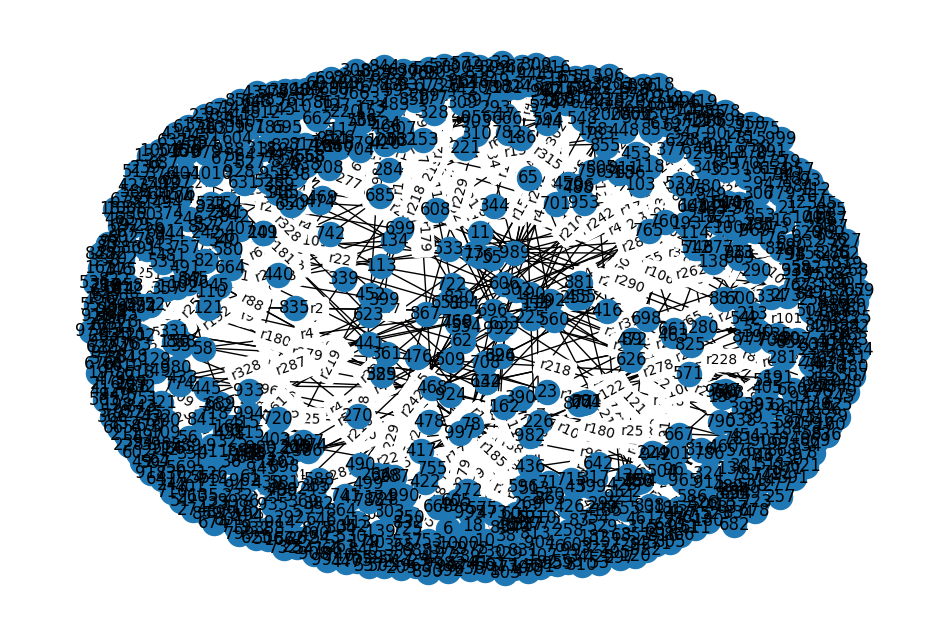

In [8]:
import os
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

# Step 3: Creating a Graph
def create_graph(triplets):
    G = nx.Graph()
    for triplet in triplets:
        subject, relation, obj = triplet
        G.add_edge(subject, obj)
    return G

# Main function
def main(data_dir):

    graph = create_graph(all_triplets)
    df = pd.DataFrame(all_triplets, columns=['Subject', 'Relation', 'Object'])

    # print(df)

    all_nodes = set(graph.nodes)
    nodes_related_id = [i+1 for i in range(len(all_nodes))]
    node_ids = dict(zip(all_nodes , nodes_related_id))

    relation_list = list(df['Relation'].unique())
    relation_related_ids = [f"r{i+1}" for i in range(len(relation_list))]
    relation_ids = dict(zip(relation_list , relation_related_ids))

    sub_id = []
    for sub in df['Subject']:
      sub_id.append(node_ids[sub])
    df['sub_id'] = sub_id

    rel_id = []
    for rel in df['Relation']:
      rel_id.append(relation_ids[rel])
    df['rel_id'] = rel_id

    obj_id = []
    for obj in df['Object']:
      obj_id.append(node_ids[obj])
    df['obj_id'] = obj_id

    print(df)
    G = nx.DiGraph()

    # Add nodes and edges to the graph
    for index, row in df.iterrows():
      # print(index , row)
        G.add_edge(row['sub_id'], row['obj_id'], label=row['rel_id'])


    # Draw the graph
    fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the size here
    pos = nx.spring_layout(G, seed=42)  # positions for all nodes, using a fixed seed value
    nx.draw_networkx_nodes(G, pos, node_size=300)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)

    # Add edge labels
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.axis('off')
    plt.show()


data_directory = "/content/drive/MyDrive/kdd project/temp"
graph = main(data_directory)


In [9]:
!pip install gensim

In [10]:
from gensim.models import Word2Vec

word_embeddings = []

for i in range(len(all_triplets)):

  model = Word2Vec([all_triplets[i]] , vector_size=2 , window=5 , min_count=1)

  word_embeddings.append({word: model.wv[word].tolist() for word in all_triplets[i]})

print(word_embeddings)

[{'రాయిమామిడి': [-0.4651474952697754, -0.35584044456481934], 'చెందిన': [0.25516748428344727, 0.4504636526107788], 'జిల్లా': [-0.02681136131286621, 0.011821568012237549]}, {'రాయిమామిడి': [-0.4651474952697754, -0.35584044456481934], 'చెందిన': [0.25516748428344727, 0.4504636526107788], 'మండలానికి': [-0.02681136131286621, 0.011821568012237549]}, {'సైన్స్': [-0.4651474952697754, -0.35584044456481934], 'ఉన్నాయి': [0.25516748428344727, 0.4504636526107788], 'కళాశాల': [-0.02681136131286621, 0.011821568012237549]}, {'సైన్స్': [-0.4651474952697754, -0.35584044456481934], 'ఉన్నాయి': [0.25516748428344727, 0.4504636526107788], 'పాడేరులోనూ': [-0.02681136131286621, 0.011821568012237549]}, {'సమీప': [-0.4651474952697754, -0.35584044456481934], 'ఉన్నాయి': [0.25516748428344727, 0.4504636526107788], 'కళాశాల': [-0.02681136131286621, 0.011821568012237549]}, {'సమీప': [-0.4651474952697754, -0.35584044456481934], 'ఉన్నాయి': [0.25516748428344727, 0.4504636526107788], 'పాడేరులోనూ': [-0.02681136131286621, 0.011821

In [11]:

from gensim.models import Word2Vec
from numpy import dot
from numpy.linalg import norm


In [32]:
import pickle

# Save the Word2Vec model and triplets to a pickle file
with open('word2vec_model.pkl', 'wb') as f:
    pickle.dump(word2vec_model, f)

with open('triplets.pkl', 'wb') as f:
    pickle.dump(all_triplets, f)

In [34]:
# Function to calculate cosine similarity
def cosine_similarity(vec1, vec2):
    return dot(vec1, vec2) / (norm(vec1) * norm(vec2))

# Function to answer question using embeddings
def answer_question_with_embeddings(question, triplets, word2vec_model):
    # Preprocess the question and get its word embeddings
    question_tokens = tokenize_telugu(question)
    question_embeddings = [word2vec_model.wv[token] for token in question_tokens if token in word2vec_model.wv]

    # Check if there are any embeddings for the question
    if not question_embeddings:
        return "Apologies, I couldn't understand the question."

    # Calculate cosine similarity between question embeddings and triplet embeddings
    max_similarity = -1
    best_triplet = None

    for triplet in triplets:
        triplet_embeddings = [word2vec_model.wv[token] for token in triplet if token in word2vec_model.wv]
        if not triplet_embeddings:
            continue

        # Calculate the similarity score between the question and the triplet
        total_similarity = sum(max(cosine_similarity(q_emb, t_emb) for t_emb in triplet_embeddings) for q_emb in question_embeddings)

        if total_similarity > max_similarity:
            max_similarity = total_similarity
            best_triplet = triplet

    # Formulate answer based on the best triplet
    if best_triplet:
        subject, relation, obj = best_triplet
        return f"{subject} {relation} {obj}"
    else:
        return "Apologies, I couldn't find an answer."

# Train Word2Vec model on extracted triplets
word2vec_model = Word2Vec(sentences=all_triplets, vector_size=100, window=5, min_count=1, workers=4)

# Take Telugu question from user
telugu_question = input("Enter your Telugu question: ")

# Answer the Telugu question using word embeddings
telugu_answer_with_embeddings = answer_question_with_embeddings(telugu_question, all_triplets, word2vec_model)
print("Question:", telugu_question)
print("Answer:", telugu_answer_with_embeddings)


Enter your Telugu question: పెద్దూర్లో  ఏమి  ఉన్నాయి
Question: పెద్దూర్లో  ఏమి  ఉన్నాయి
Answer: ఆఫీసు ఉన్నాయి పెద్దూర్లో


In [42]:
# Function to calculate cosine similarity
def cosine_similarity(vec1, vec2):
    return dot(vec1, vec2) / (norm(vec1) * norm(vec2))

# Function to answer question using embeddings
def answer_question_with_embeddings(question, triplets, word2vec_model):
    # Preprocess the question and get its word embeddings
    question_tokens = tokenize_telugu(question)
    question_embeddings = [word2vec_model.wv[token] for token in question_tokens if token in word2vec_model.wv]

    # Check if there are any embeddings for the question
    if not question_embeddings:
        return "Apologies, I couldn't understand the question."

    # Calculate cosine similarity between question embeddings and triplet embeddings
    max_similarity = -1
    best_triplet = None

    for triplet in triplets:
        triplet_embeddings = [word2vec_model.wv[token] for token in triplet if token in word2vec_model.wv]
        if not triplet_embeddings:
            continue

        # Calculate the similarity score between the question and the triplet
        total_similarity = sum(max(cosine_similarity(q_emb, t_emb) for t_emb in triplet_embeddings) for q_emb in question_embeddings)

        if total_similarity > max_similarity:
            max_similarity = total_similarity
            best_triplet = triplet

    # Formulate answer based on the best triplet
    if best_triplet:
        subject, relation, obj = best_triplet
        return f"{subject} {relation} {obj}"
    else:
        return "Apologies, I couldn't find an answer."

# Train Word2Vec model on extracted triplets
word2vec_model = Word2Vec(sentences=all_triplets, vector_size=100, window=5, min_count=1, workers=4)

# Take Telugu question from user
telugu_question = input("Enter your Telugu question: ")

# Answer the Telugu question using word embeddings
telugu_answer_with_embeddings = answer_question_with_embeddings(telugu_question, all_triplets, word2vec_model)
print("Question:", telugu_question)
print("Answer:", telugu_answer_with_embeddings)


Enter your Telugu question: పోస్ట్ ఎక్కడ ఉంది?
Question: పోస్ట్ ఎక్కడ ఉంది?
Answer: పోస్ట్ ఉంది దూరంలో


In [48]:
test_questions_and_answers = [
    ("ఆఫీసు ఎక్కడ ఉన్నాయి?", ("ఆఫీసు", "ఉన్నాయి", "పెద్దూర్లో")),
    ("కోరిక ఎక్కడ వస్తోంది?", ("కోరిక", "వస్తోంది", "దేశంలో")),
    ("వ్యవస్థ ఎక్కడ ఉంది?", ("వ్యవస్థ", "ఉంది", "గ్రామంలో")),
    ("ఆకారం ఎక్కడ తీర్చిదిద్దారు?", ("ఆకారం", "తీర్చిదిద్దారు", "మట్టిరంగుతో")),
    ("పోస్ట్ ఎక్కడ ఉంది?", ("పోస్ట్", "ఉంది", "దూరంలో")),
     ("గాంధీ ఎక్కడ పుట్టాడు?", ("గాంధీ", "పుట్టాడు", "పొరటా")),
      ("మహాత్మా ఫునా ఎక్కడ నిర్మించాడు?", ("మహాత్మా", "నిర్మించాడు", "బాంధవ్యా"))
]

In [49]:
def calculate_hit_k(test_questions_and_answers, all_triplets, word2vec_model, k):
    hits = 0
    for i, (question, correct_triplet) in enumerate(test_questions_and_answers):
        # Answer the question using the model
        doc = nlp(question)
        question_tokens = [word.text for sent in doc.sentences for word in sent.words]
        question_embeddings = [word2vec_model.wv[token] for token in question_tokens if token in word2vec_model.wv]

        # Debugging statements
        print(f"Processing question {i+1}/{len(test_questions_and_answers)}: {question}")
        print(f"Correct triplet: {correct_triplet}")
        print(f"Question tokens: {question_tokens}")
        print(f"Number of question embeddings: {len(question_embeddings)}")

        if not question_embeddings:
            print("No embeddings found for the question. Skipping...")
            continue

        # Calculate cosine similarity between question embeddings and triplet embeddings
        similarity_scores = []
        for triplet in all_triplets:
            triplet_embeddings = [word2vec_model.wv[token] for token in triplet if token in word2vec_model.wv]
            if not triplet_embeddings:
                continue

            total_similarity = sum(max(cosine_similarity(q_emb, t_emb) for t_emb in triplet_embeddings) for q_emb in question_embeddings)
            similarity_scores.append((total_similarity, triplet))

        # Debugging statements
        print(f"Number of triplets with embeddings: {len(similarity_scores)}")

        # Sort triplets based on similarity scores
        similarity_scores.sort(reverse=True, key=lambda x: x[0])

        # Check if the correct triplet is within the top K
        top_k_triplets = [triplet for _, triplet in similarity_scores[:k]]
        if correct_triplet in top_k_triplets:
            hits += 1

        # Debugging statements
        print(f"Top {k} triplets: {top_k_triplets}")
        print(f"Current hits: {hits}")

    return hits / len(test_questions_and_answers)

# Example usage:
# Assuming all_triplets, word2vec_model are defined and trained, and test_questions_and_answers is provided
hit_1 = calculate_hit_k(test_questions_and_answers, all_triplets, word2vec_model, 1)
hit_5 = calculate_hit_k(test_questions_and_answers, all_triplets, word2vec_model, 5)
hit_10 = calculate_hit_k(test_questions_and_answers, all_triplets, word2vec_model, 10)

print(f"Hit@1: {hit_1}")
print(f"Hit@5: {hit_5}")
print(f"Hit@10: {hit_10}")


Processing question 1/7: ఆఫీసు ఎక్కడ ఉన్నాయి?
Correct triplet: ('ఆఫీసు', 'ఉన్నాయి', 'పెద్దూర్లో')
Question tokens: ['ఆఫీసు', 'ఎక్కడ', 'ఉన్నాయి', '?']
Number of question embeddings: 2
Number of triplets with embeddings: 877
Top 1 triplets: [('ఆఫీసు', 'ఉన్నాయి', 'పెద్దూర్లో')]
Current hits: 1
Processing question 2/7: కోరిక ఎక్కడ వస్తోంది?
Correct triplet: ('కోరిక', 'వస్తోంది', 'దేశంలో')
Question tokens: ['కోరిక', 'ఎక్కడ', 'వస్తోంది', '?']
Number of question embeddings: 2
Number of triplets with embeddings: 877
Top 1 triplets: [('కోరిక', 'వస్తోంది', 'దేశంలో')]
Current hits: 2
Processing question 3/7: వ్యవస్థ ఎక్కడ ఉంది?
Correct triplet: ('వ్యవస్థ', 'ఉంది', 'గ్రామంలో')
Question tokens: ['వ్యవస్థ', 'ఎక్కడ', 'ఉంది', '?']
Number of question embeddings: 2
Number of triplets with embeddings: 877
Top 1 triplets: [('వ్యవస్థ', 'ఉంది', 'గ్రామంలో')]
Current hits: 3
Processing question 4/7: ఆకారం ఎక్కడ తీర్చిదిద్దారు?
Correct triplet: ('ఆకారం', 'తీర్చిదిద్దారు', 'మట్టిరంగుతో')
Question tokens: ['ఆకార